### Connect the 500Gb orange disk (AIA-FOXSI2 Data)

This notebook is working with Sunpy version 0.8.3 (2018-Feb)

## Goal: To find AIA brightnings in all AIA-wavelenghts for the times and targets FOXSI2 observed.

### @Milo

In [58]:
import glob
from sunpy.map import Map
from sunpy.time import TimeRange
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### FOXSI2 targets and times

In [95]:
Ftarget = {'cen1_pos0':(359.0, -431.0), # arcsec
           'cen1_pos1':(-1.0, -431.0),
           'cen1_pos2':(-1.0, -251.0),
           'cen2_pos0':(-1.0, -281.0),
           'cen2_pos1':(-390.0, -281.0),
           'cen3_pos0':(1210.5, -431.5),
           'cen3_pos1':(850.0, -431.5),
           'cen3_pos2':(850.0, -251.0),
           'cen4':(200.0, 750.0),
           'cen5':(0.0, -251.0)}
Ftimes = {'cen1_pos0': TimeRange(['2014-12-11 19:12:42', '2014-12-11 19:13:14.3']),
            'cen1_pos1':TimeRange(['2014-12-11 19:13:18','2014-12-11 19:13:42.6']),
            'cen1_pos2':TimeRange(['2014-12-11 19:13:46.5','2014-12-11 19:14:25']),
            'cen2_pos0':TimeRange(['2014-12-11 19:14:29','2014-12-11 19:14:39.6']),
            'cen2_pos1':TimeRange(['2014-12-11 19:14:44','2014-12-11 19:15:36.7']),
            'cen3_pos0':TimeRange(['2014-12-11 19:15:40.6','2014-12-11 19:16:07.2']),
            'cen3_pos1':TimeRange(['2014-12-11 19:16:11','2014-12-11 19:16:30.1']),
            'cen3_pos2':TimeRange(['2014-12-11 19:16:34','2014-12-11 19:17:09.2']),
            'cen4':TimeRange(['2014-12-11 19:17:13.5','2014-12-11 19:18:46.2']),
            'cen5':TimeRange(['2014-12-11 19:18:50.5','2014-12-11 19:19:23.2']),
            't_shtr':TimeRange(['2014-12-11 19:18:18','2014-12-11 19:18:22'])}
fov = (1000,1000) # arcsec

## STD function definition

In [156]:
def std(cmaps):
    """
    Calculate the standard deviation of the data array.
    """
    _meta = []
    for i, m in enumerate(cmaps):
        _meta.append(m.meta)
    data = np.zeros((cmaps[0].data.shape[0], cmaps[0].data.shape[1], len(cmaps)), dtype=cmaps[0].data.dtype)
    for i, m in enumerate(cmaps):
        data[:, :, i] = m.data
    return Map(np.std(data, axis=2), _meta[1])

## Reading AIA data:

In [17]:
data_dir = '/Volumes/500GB/AIA/'
str_indices = {'94':'', '131':'', '171':'', '193':'', '211':'', '304':'', '335':'', '1600':'', '1700':''}
file_list = {}
maps = {}
for key in str_indices:
    file_list.update({key: glob.glob(data_dir + '*' + key + '*.fits')})

In [229]:
these_files = file_list['94'][70:90]
maps = []
for f in these_files:
    smap = Map(f)
    top_right = SkyCoord(100*u.arcsec, -170 * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord(-80 * u.arcsec, -350 * u.arcsec, frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)

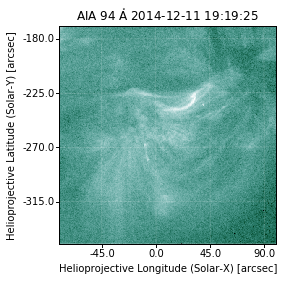

In [231]:
maps[16].plot()

# Target 1 Pos 0

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1706: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


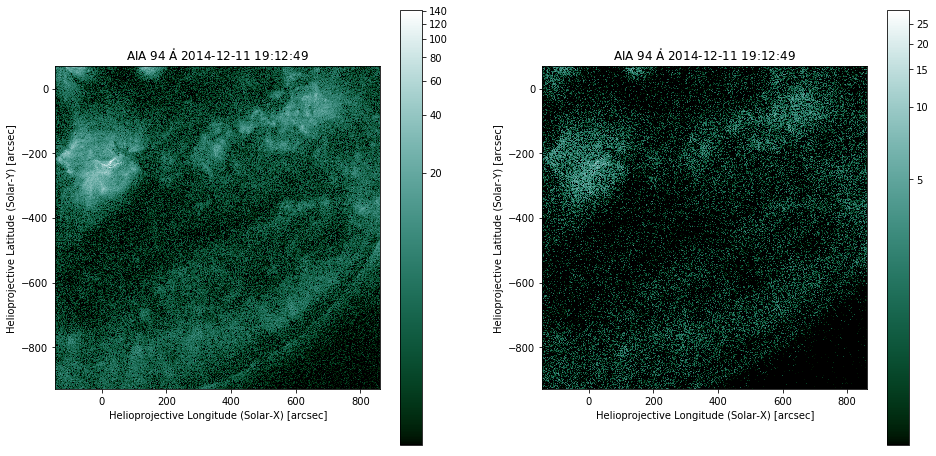

In [159]:
these_files = file_list['94'][55:59]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen1_pos0'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen1_pos0'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen1_pos0'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen1_pos0'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.05*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 1 Pos 1

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1706: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


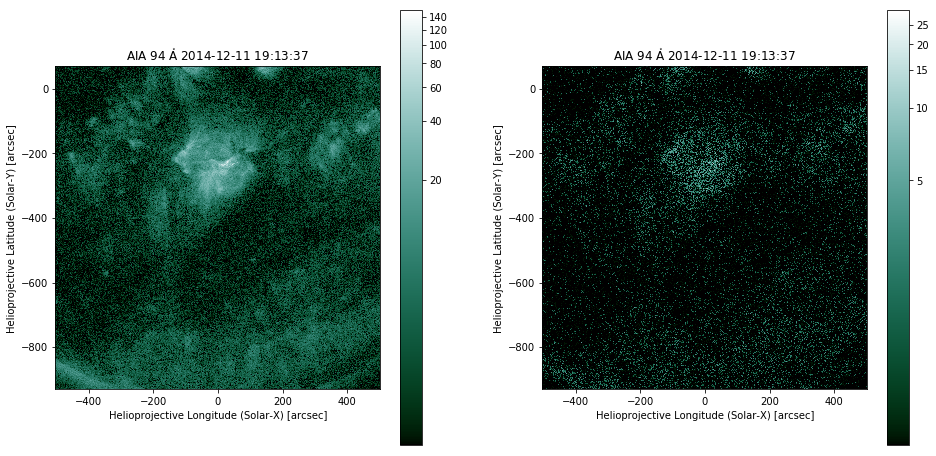

In [166]:
these_files = file_list['94'][58:60]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen1_pos1'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen1_pos1'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen1_pos1'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen1_pos1'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.05*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 1 Pos 2

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1706: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


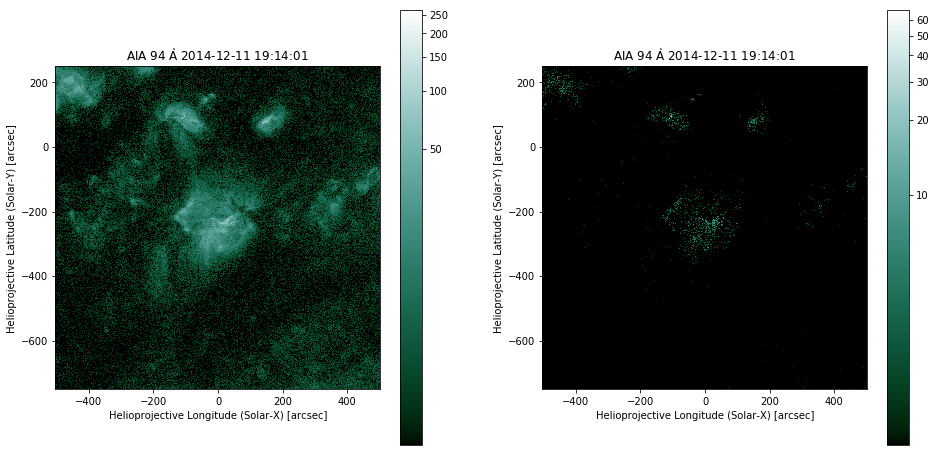

In [178]:
these_files = file_list['94'][59:63]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen1_pos2'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen1_pos2'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen1_pos2'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen1_pos2'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.05*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 2 Pos 0 

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1706: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


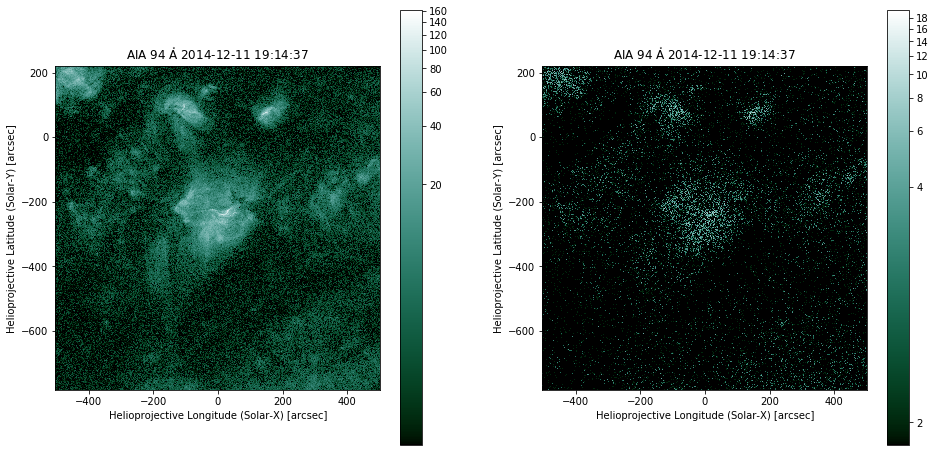

In [190]:
these_files = file_list['94'][62:64]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen2_pos0'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen2_pos0'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen2_pos0'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen2_pos0'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.1*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 2 Pos 1

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1706: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


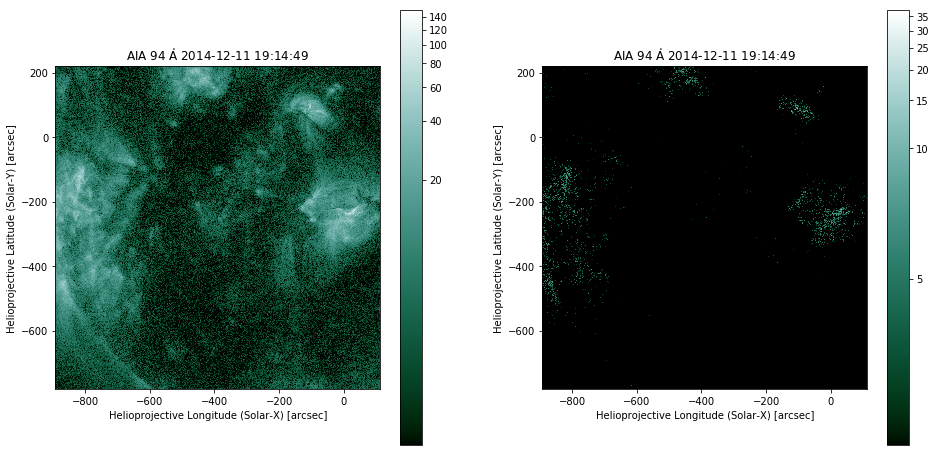

In [197]:
these_files = file_list['94'][63:68]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen2_pos1'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen2_pos1'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen2_pos1'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen2_pos1'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.1*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 3 Pos 0

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1706: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


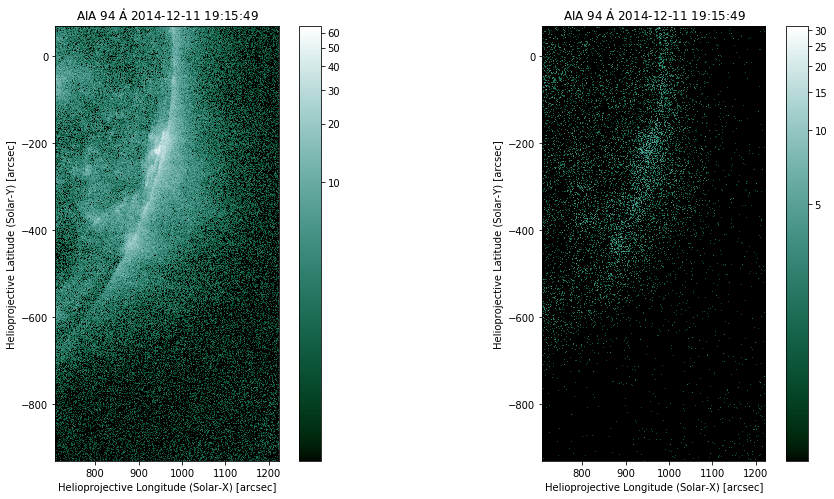

In [202]:
these_files = file_list['94'][68:70]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen3_pos0'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen3_pos0'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen3_pos0'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen3_pos0'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.05*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 3 Pos 1

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1706: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


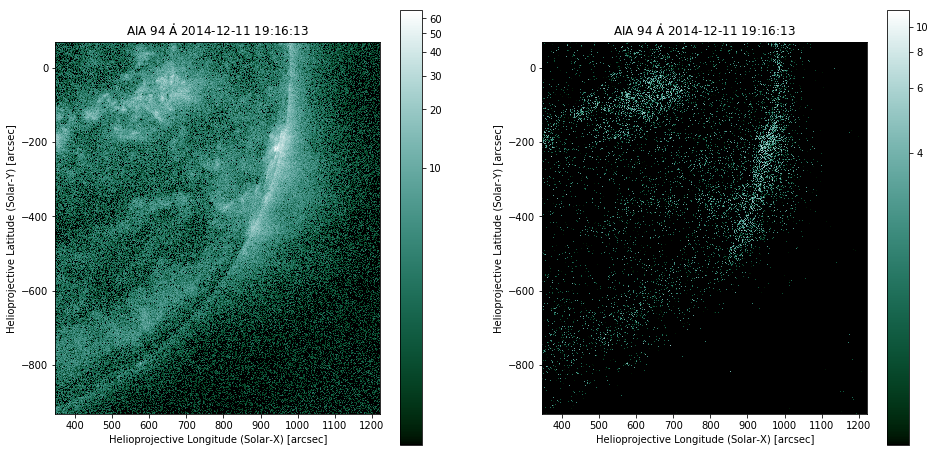

In [210]:
these_files = file_list['94'][69:72]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen3_pos1'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen3_pos1'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen3_pos1'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen3_pos1'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.2*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 3 Pos 2

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1706: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


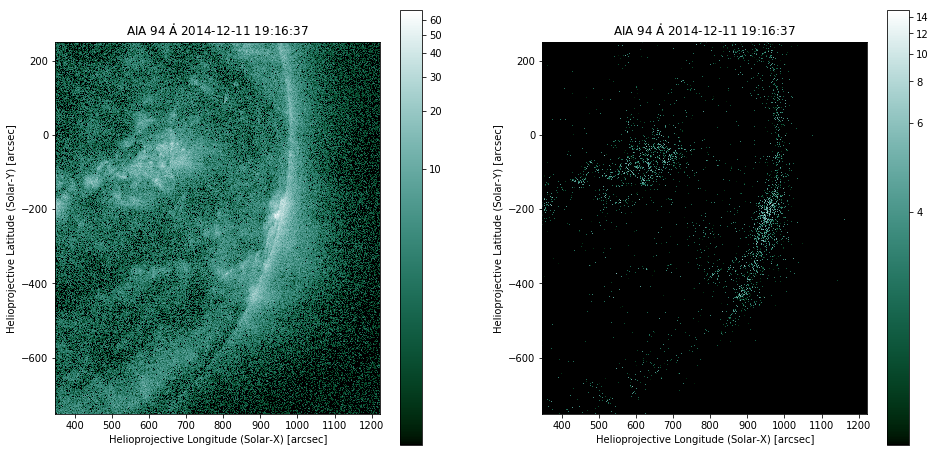

In [216]:
these_files = file_list['94'][71:75]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen3_pos2'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen3_pos2'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen3_pos2'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen3_pos2'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.2*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 4

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1706: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


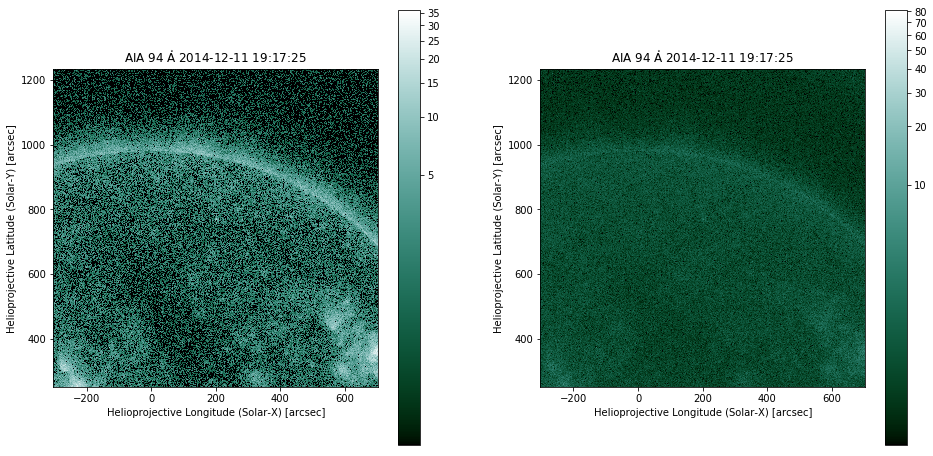

In [228]:
these_files = file_list['94'][75:83]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen4'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen4'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen4'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen4'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.005*stdmap.data.max())
plt.colorbar()
plt.show()

# Target 5

## AIA 94

/Users/Kamilobu/anaconda3/lib/python3.6/site-packages/sunpy/map/mapbase.py:1706: Warning: This map is not properly oriented. Plot axes may be incorrect
  Warning)


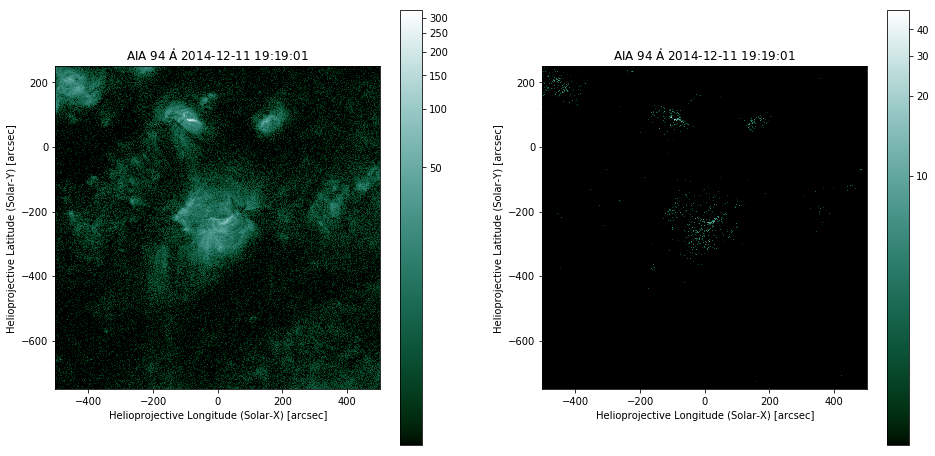

In [236]:
these_files = file_list['94'][83:86]
maps = []
for f in these_files:
    smap = Map(f)
    top_right =   SkyCoord((Ftarget['cen5'][0] + fov[0]/2) * u.arcsec, 
                           (Ftarget['cen5'][1] + fov[1]/2) * u.arcsec, frame=smap.coordinate_frame)
    bottom_left = SkyCoord((Ftarget['cen5'][0] - fov[0]/2) * u.arcsec, 
                           (Ftarget['cen5'][1] - fov[1]/2) * u.arcsec,frame=smap.coordinate_frame)
    submap = smap.submap(bottom_left, top_right)
    maps.append(submap)
stdmap = std(maps)
'''Plotting'''
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
maps[1].plot(vmin=0.005*maps[1].max())
plt.colorbar()
plt.subplot(1,2,2)
stdmap.plot(vmin=0.08*stdmap.data.max())
plt.colorbar()
plt.show()